<a href="https://colab.research.google.com/github/hfernandescfc/case_vivo/blob/main/CASE_VIVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

### Framework



1.   Avaliação dos tipos de dados disponíveis com a biblioteca pandas (tipos de variáveis envolvidas)
2.   Limpeza de dados utilizando pandas. Verificação / preenchimento de dados faltantes e manipulação de variáveis.
3.   Análise exploratória dos dados - análise univariada e multivariada utilizando pandas e bibliotecas de visualização como matplotlib e seaborn. Foco no entendimento do comportamento de cada variável.
4.   Após entendimento das variáveis e as respectivas relações com as outras, definição dos critérios de bom e mau desempenho, bem como apontamento da lista de clientes em cada categoria.
5.   Preprocessamento (enconding de variáveis categóricas e aplicação de scaling para média 0 e variância 1) e aplicação de algoritmos de clustering

### 1. Interpretação dos dados

In [33]:
path = r'/content/havai.txt'
df = pd.read_csv(path, sep = ';')

In [34]:
df.columns

Index(['AP', 'STA', 'RSSI_DBM', 'TX_PHY_RATE', 'CCA_INT', 'FQ', 'ID_CLIENTE',
       'PLANO'],
      dtype='object')

In [35]:
chaves = ['ID_CLIENTE', 'AP', 'STA']
categoricas = ['FQ', 'PLANO', 'RSSI_DBM']
numericas = ['TX_PHY_RATE', 'CCA_INT']

In [36]:
df.head()

,AP,STA,RSSI_DBM,TX_PHY_RATE,CCA_INT,FQ,ID_CLIENTE,PLANO
0,a4:33:d7:8e:56:e7,68:27:37:76:94:2e,-56,300,0,5G BS,1,200 Mbps
1,a4:33:d7:8e:56:e7,68:b9:d3:94:c3:2b,-40,65,90,"2,4G",1,200 Mbps
2,10:72:23:7f:ce:df,28:83:35:3f:73:21,-52,58,100,"2,4G",2,50 Mbps
3,a4:33:d7:88:28:7b,d8:08:31:16:2d:ec,-87,65,0,5G,3,200 Mbps
4,a4:33:d7:88:28:7b,90:fd:61:50:cd:03,-62,1,160,"2,4G",3,200 Mbps


In [37]:
for i in chaves:
  print(df[i].value_counts())

2768    14
2749    13
1372    13
1746    13
1891    13
        ..
987      1
3114     1
3113     1
3112     1
993      1
Name: ID_CLIENTE, Length: 4076, dtype: int64
d8:c6:78:5b:f6:80    14
10:72:23:be:a7:ba    13
d8:c6:78:3d:f0:38    13
10:72:23:46:7c:c3    13
c0:3d:d9:86:d1:50    13
                     ..
10:72:23:81:38:ec     1
ac:c6:62:18:68:29     1
98:7e:ca:27:14:bf     1
d8:c6:78:05:55:08     1
ac:c6:62:d4:be:6b     1
Name: AP, Length: 4076, dtype: int64
00:7c:2d:6b:35:0b    4
30:4b:07:44:94:fb    2
5c:c9:d3:b0:f5:2b    2
0c:cb:85:c2:2e:6b    2
dc:b7:2e:01:9f:b2    2
                    ..
00:1a:3f:b6:1c:d1    1
00:9e:ee:16:26:60    1
60:3c:ee:57:ee:79    1
48:49:c7:95:06:38    1
54:f1:5f:61:92:60    1
Name: STA, Length: 9959, dtype: int64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AP           10000 non-null  object
 1   STA          10000 non-null  object
 2   RSSI_DBM     10000 non-null  int64 
 3   TX_PHY_RATE  10000 non-null  int64 
 4   CCA_INT      10000 non-null  int64 
 5   FQ           9984 non-null   object
 6   ID_CLIENTE   10000 non-null  int64 
 7   PLANO        10000 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [39]:
df[numericas].describe()

,TX_PHY_RATE,CCA_INT
count,10000.00000,10000.000000
mean,188.13870,56.162800
std,229.19913,110.395284
min,0.00000,0.000000
25%,65.00000,0.000000
50%,72.00000,2.000000
75%,260.00000,60.000000
max,1560.00000,810.000000


### 2. Tratamento dos dados

In [40]:
df['cut_SSI'] = pd.cut(df['RSSI_DBM'], 5) # separação em bins para melhor entendimento da variável

In [99]:
print(f'O dataframe possui um total de {df.isna().sum()[1]} valores faltantes')

O dataframe possui um total de 0 valores faltantes


In [41]:
missing_fq = pd.isna(df['FQ'])

df[missing_fq]

,AP,STA,RSSI_DBM,TX_PHY_RATE,CCA_INT,FQ,ID_CLIENTE,PLANO,cut_SSI
1317,10:72:23:48:95:f3,a4:33:d7:77:63:fd,-51,683,27,NaN,573,300 Mbps,"(-57.0, -38.0]"
3161,94:ea:ea:87:ce:6b,a4:33:d7:55:54:fd,-72,585,18,NaN,1313,300 Mbps,"(-76.0, -57.0]"
3173,78:e9:cf:0a:d9:cf,d8:c6:78:8d:63:ba,-61,780,0,NaN,1320,100 Mbps,"(-76.0, -57.0]"
4689,cc:ed:dc:37:c4:55,74:40:be:93:04:5a,-43,72,0,NaN,1911,100 Mbps,"(-57.0, -38.0]"
4691,cc:ed:dc:37:c4:55,74:40:be:92:e9:64,-60,72,0,NaN,1911,100 Mbps,"(-76.0, -57.0]"
6129,d8:c6:78:1f:88:a6,d4:63:c6:cb:6e:df,-62,65,0,NaN,2494,200 Mbps,"(-76.0, -57.0]"
6130,d8:c6:78:1f:88:a6,d4:63:c6:c7:d0:e9,-79,72,0,NaN,2494,200 Mbps,"(-95.095, -76.0]"
6131,d8:c6:78:1f:88:a6,30:cb:f8:13:f5:97,-72,43,0,NaN,2494,200 Mbps,"(-76.0, -57.0]"
6132,d8:c6:78:1f:88:a6,00:1c:7b:76:bd:81,-74,72,0,NaN,2494,200 Mbps,"(-76.0, -57.0]"
6133,d8:c6:78:1f:88:a6,00:17:c4:33:05:9f,-50,48,0,NaN,2494,200 Mbps,"(-57.0, -38.0]"


In [42]:
df['FQ'] = df['FQ'].fillna(df['FQ'].mode()[0]) # preenchimento dos valores com a moda da frequência

In [43]:
df['PLANO'] = df['PLANO'].map(lambda x : x.split()[0])

In [44]:
df['PLANO'] = df['PLANO'].astype('int64')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   AP           10000 non-null  object  
 1   STA          10000 non-null  object  
 2   RSSI_DBM     10000 non-null  int64   
 3   TX_PHY_RATE  10000 non-null  int64   
 4   CCA_INT      10000 non-null  int64   
 5   FQ           10000 non-null  object  
 6   ID_CLIENTE   10000 non-null  int64   
 7   PLANO        10000 non-null  int64   
 8   cut_SSI      10000 non-null  category
dtypes: category(1), int64(5), object(3)
memory usage: 635.1+ KB


### Análise Univariada

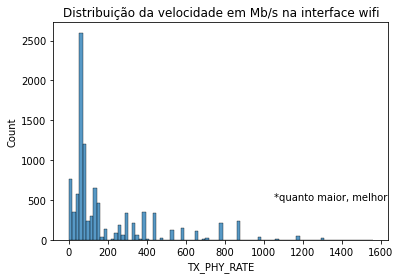

In [46]:
sns.histplot(data = df['TX_PHY_RATE'])
plt.title('Distribuição da velocidade em Mb/s na interface wifi')
plt.annotate('*quanto maior, melhor', xy = (1050, 500))
plt.show()

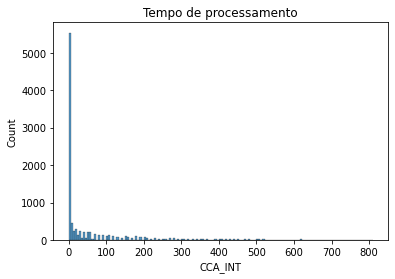

In [47]:
sns.histplot(data = df['CCA_INT'])
plt.title('Tempo de processamento')
plt.show()

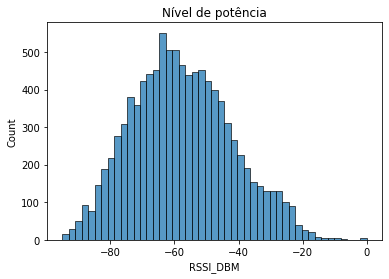

In [48]:
sns.histplot(data = df['RSSI_DBM'])
plt.title('Nível de potência')
plt.show()

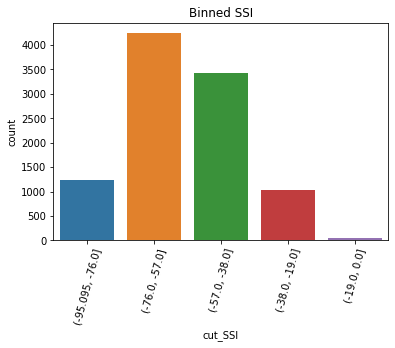

In [49]:
sns.countplot(x = df['cut_SSI'])
plt.title('Binned SSI')
plt.xticks(rotation = 75)
plt.show()

In [50]:
df['FQ'].value_counts()

2,4G     6044
5G BS    1986
5G       1970
Name: FQ, dtype: int64

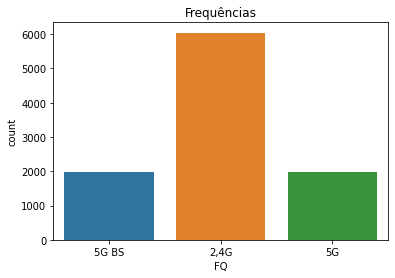

In [51]:
sns.countplot(data = df, x = 'FQ')
plt.title('Frequências')
plt.show()

In [52]:
df['PLANO'].value_counts()

100    2587
50     2535
200    2483
300    2395
Name: PLANO, dtype: int64

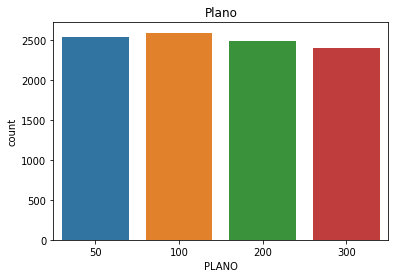

In [53]:
sns.countplot(data = df, x = 'PLANO')
plt.title('Plano')
plt.show()

In [54]:
df.groupby('PLANO').agg(TX_PHY_RATE = ('TX_PHY_RATE', 'mean'),
                                CCA_INT = ('CCA_INT', 'mean'))

,TX_PHY_RATE,CCA_INT
PLANO,,
50,189.324260,55.723471
100,192.923463,52.069192
200,189.241240,58.645993
300,180.572443,58.475157


In [55]:
df.groupby('FQ').agg(TX_PHY_RATE = ('TX_PHY_RATE', 'mean'),
                                CCA_INT = ('CCA_INT', 'mean'))

,TX_PHY_RATE,CCA_INT
FQ,,
"2,4G",66.344143,84.028293
5G,396.658376,14.067005
5G BS,351.956697,13.116314


In [56]:
df.groupby('cut_SSI').agg(TX_PHY_RATE = ('TX_PHY_RATE', 'mean'),
                                CCA_INT = ('CCA_INT', 'mean'))

,TX_PHY_RATE,CCA_INT
cut_SSI,,
"(-95.095, -76.0]",141.106024,22.060241
"(-76.0, -57.0]",185.890068,48.812220
"(-57.0, -38.0]",195.395748,70.513104
"(-38.0, -19.0]",230.675676,78.753861
"(-19.0, 0.0]",168.543478,76.456522


### Análise Multivariada

In [57]:
grouped_planfreq = df.groupby(['PLANO', 'FQ', 'cut_SSI']).agg(TX_PHY_RATE = ('TX_PHY_RATE', 'mean'),
                                CCA_INT = ('CCA_INT', 'mean'))
grouped_planfreq

TX_PHY_RATE     CCA_INT
PLANO FQ    cut_SSI                                  
50    2,4G  (-95.095, -76.0]    43.763636   36.727273
            (-76.0, -57.0]      63.651376   74.006116
            (-57.0, -38.0]      69.554174  104.404973
            (-38.0, -19.0]      80.062893   98.050314
            (-19.0, 0.0]        69.000000  102.000000
      5G    (-95.095, -76.0]   198.230769   12.528846
            (-76.0, -57.0]     381.671111   15.666667
            (-57.0, -38.0]     464.697368   12.651316
            (-38.0, -19.0]     492.142857   17.660714
            (-19.0, 0.0]       513.250000   16.250000
      5G BS (-95.095, -76.0]   205.306931    7.168317
            (-76.0, -57.0]     339.430556   12.097222
            (-57.0, -38.0]     430.345070    9.929577
            (-38.0, -19.0]     487.564103   22.487179
            (-19.0, 0.0]              NaN         NaN
100   2,4G  (-95.095, -76.0]    41.535714   31.339286
            (-76.0, -57.0]      66.125397   69.142857
            (-57.0, -38.0]      70.818333   86.650000
            (-38.0, -19.0]      70.917127  107.513812
            (-19.0, 0.0]        71.666667   31.666667
      5G    (-95.095, -76.0]   199.842593   11.157407
            (-76.0, -57.0]     375.722772   16.821782
            (-57.0, -38.0]     491.373134   13.514925
            (-38.0, -19.0]     538.916667   14.233333
            (-19.0, 0.0]              NaN         NaN
      5G BS (-95.095, -76.0]   210.641791   19.574627
            (-76.0, -57.0]     383.452915   13.645740
            (-57.0, -38.0]     436.886667   17.253333
            (-38.0, -19.0]     470.170213   10.021277
            (-19.0, 0.0]              NaN         NaN
200   2,4G  (-95.095, -76.0]    38.376068   35.897436
            (-76.0, -57.0]      64.019146   70.957290
            (-57.0, -38.0]      69.998192  103.471971
            (-38.0, -19.0]      76.646707  130.658683
            (-19.0, 0.0]        74.428571   70.000000
      5G    (-95.095, -76.0]   220.358025   14.962963
            (-76.0, -57.0]     415.536946   14.916256
            (-57.0, -38.0]     486.027972   15.482517
            (-38.0, -19.0]     608.893617   16.446809
            (-19.0, 0.0]       628.666667   13.000000
      5G BS (-95.095, -76.0]   158.688889   16.566667
            (-76.0, -57.0]     337.817778   13.275556
            (-57.0, -38.0]     445.301471   12.000000
            (-38.0, -19.0]     526.125000   10.375000
            (-19.0, 0.0]              NaN         NaN
300   2,4G  (-95.095, -76.0]    38.462963   40.925926
            (-76.0, -57.0]      65.071547   72.861897
            (-57.0, -38.0]      69.378069   97.883797
            (-38.0, -19.0]      81.425926  121.851852
            (-19.0, 0.0]        75.928571  118.571429
      5G    (-95.095, -76.0]   191.824176   15.571429
            (-76.0, -57.0]     386.971429   12.274286
            (-57.0, -38.0]     493.875969   10.992248
            (-38.0, -19.0]     518.269231    6.826923
            (-19.0, 0.0]       975.000000   35.000000
      5G BS (-95.095, -76.0]   188.977528   14.831461
            (-76.0, -57.0]     356.514563   10.888350
            (-57.0, -38.0]     424.355372   11.148760
            (-38.0, -19.0]     412.088235    9.647059
            (-19.0, 0.0]       135.000000   18.000000

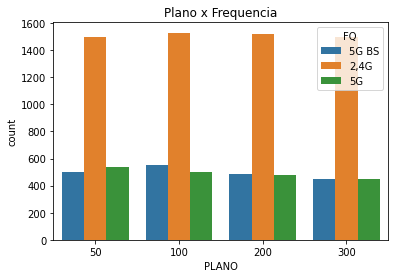

In [58]:
sns.countplot(data = df, 
              x = 'PLANO',
              hue = 'FQ')
plt.title('Plano x Frequencia')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

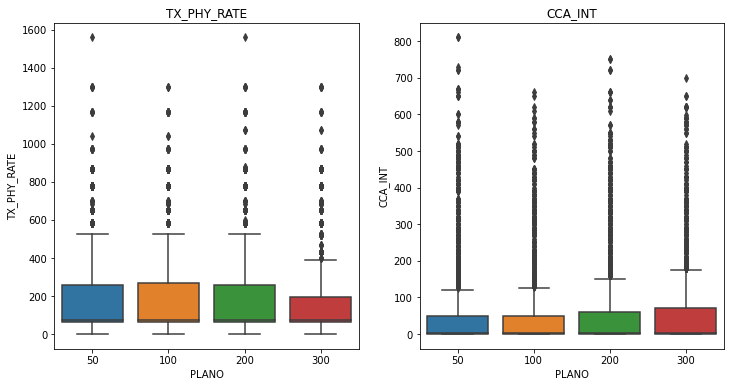

In [59]:
#Plano x numéricas

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (12, 6))

for i, n in enumerate(numericas):

  sns.boxplot(data = df.sort_values(by='PLANO', ascending = True),
              x = 'PLANO',
              y = df[n],
              ax = ax[i])
  ax[i].set_title(n)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

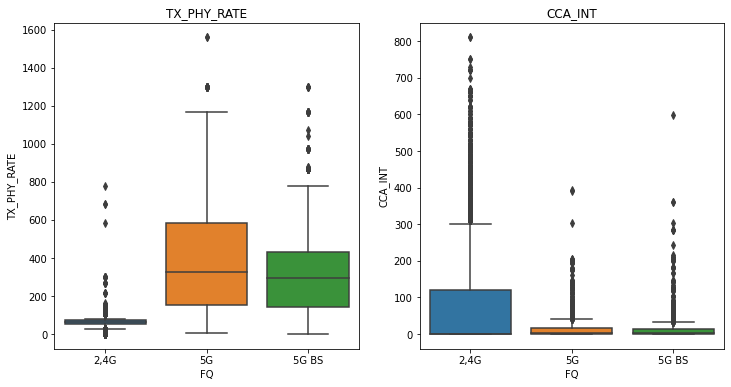

In [60]:
#Plano x numéricas

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (12, 6))

for i, n in enumerate(numericas):

  sns.boxplot(data = df.sort_values(by='FQ', ascending = True),
              x = 'FQ',
              y = df[n],
              ax = ax[i])
  ax[i].set_title(n)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

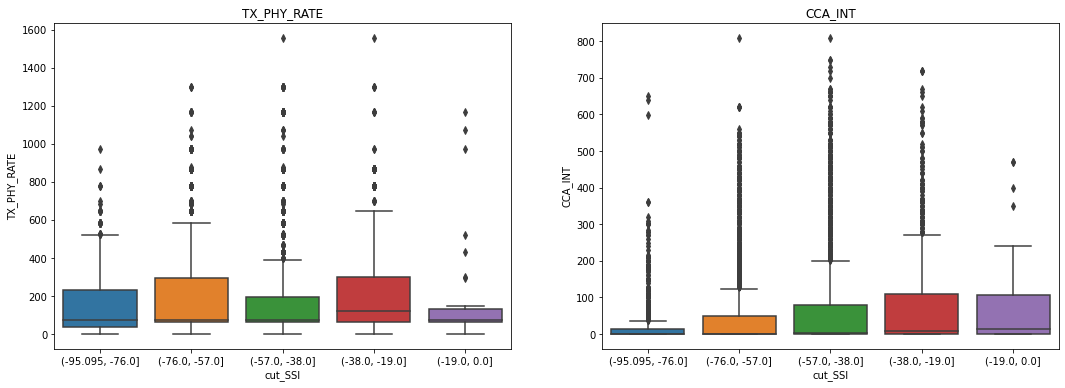

In [61]:
#Plano x numéricas

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (18, 6))

for i, n in enumerate(numericas):

  sns.boxplot(data = df.sort_values(by='cut_SSI', ascending = True),
              x = 'cut_SSI',
              y = df[n],
              ax = ax[i])
  ax[i].set_title(n)


plt.show

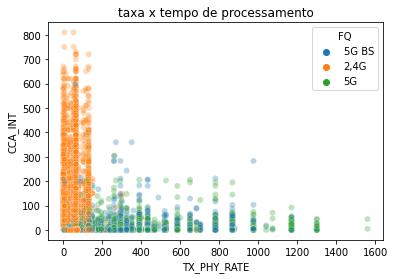

In [62]:
sns.scatterplot(data = df,
                x = 'TX_PHY_RATE',
                y = 'CCA_INT',
                alpha = 0.3,
                hue = 'FQ')
plt.title('taxa x tempo de processamento')
plt.show()

In [63]:
corr_df = df[['TX_PHY_RATE', 'CCA_INT', 'RSSI_DBM', 'PLANO']].corr()

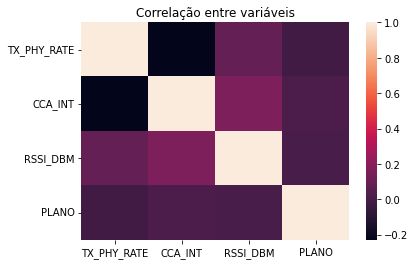

In [64]:
sns.heatmap(corr_df)
plt.title('Correlação entre variáveis')
plt.show()


### Avaliação do desempenho

In [66]:
tempo_bom_threeshold = df['CCA_INT'].quantile(0.25)
tempo_ruim_threeshold = df['CCA_INT'].quantile(0.75)

tempo_bom_df = df[df['CCA_INT'] <= tempo_bom_threeshold]
tempo_ruim_df = df[df['CCA_INT'] >= tempo_ruim_threeshold]

In [67]:
print(f'Quantidade de dispositivos com bom tempo: {tempo_bom_df.shape[0]}')
print('\n')
print(f'Quantidade de dispositivos com tempo ruim: {tempo_ruim_df.shape[0]}')

Quantidade de dispositivos com bom tempo: 4434


Quantidade de dispositivos com tempo ruim: 2552


In [68]:
print(tempo_bom_df['ID_CLIENTE'].unique().shape[0])

print(tempo_ruim_df['ID_CLIENTE'].unique().shape[0])

2338
1272


In [69]:
velocidade_boa_threeshold = df['TX_PHY_RATE'].quantile(0.75)
velocidade_ruim_threeshold = df['TX_PHY_RATE'].quantile(0.25)

velocidade_boa_df = df[df['TX_PHY_RATE'] >= velocidade_boa_threeshold]
velocidade_ruim_df = df[df['TX_PHY_RATE'] <= velocidade_ruim_threeshold]

In [70]:
print(f'Quantidade de dispositivos com boa velocidade: {velocidade_boa_df.shape[0]}')
print('\n')
print(f'Quantidade de dispositivos com velocidade ruim: {velocidade_ruim_df.shape[0]}')

Quantidade de dispositivos com boa velocidade: 2586


Quantidade de dispositivos com velocidade ruim: 4289


In [71]:
intersecção_bons_dispositivos = tempo_bom_df.loc[tempo_bom_df['STA'].isin(velocidade_boa_df['STA'])]

intersecção_dispositivos_ruins = tempo_ruim_df.loc[tempo_ruim_df['STA'].isin(velocidade_ruim_df['STA'])]

In [101]:
Bons_Dispositivos = list(intersecção_bons_dispositivos['STA'].unique()) #Lista de dispositivos com bom desempenho
Dispositivos_Ruins = list(intersecção_dispositivos_ruins['STA'].unique()) #Lista de dispositivos com bom desempenho

In [72]:
print(f'Quantidade de dispositivos com boa velocidade e bom tempo de processamento: {intersecção_bons_dispositivos.shape[0]}')
print('\n')
print(f' Quantidade de dispositivos com velocidade de tempo de processamento ruins {intersecção_dispositivos_ruins.shape[0]}')

Quantidade de dispositivos com boa velocidade e bom tempo de processamento: 815


 Quantidade de dispositivos com velocidade de tempo de processamento ruins 2026


### Segmentação de clientes

Após avaliação do desempenho dos clientes, uma outra abordagem interessante se dá na segmentação dos clientes para que possam ser tratados de maneira diversa de acordo com suas peculiaridades em comum. Para isso, será utilizado um algoritmo de clusterização chamado Kmeans.agglomerativeclustering.

In [75]:
cluster_df = df.drop(columns = 'cut_SSI')

In [80]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
cluster_df['FQ']=cluster_df[['FQ']].apply(LE.fit_transform)

All features are now numerical


In [81]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AP           10000 non-null  object
 1   STA          10000 non-null  object
 2   RSSI_DBM     10000 non-null  int64 
 3   TX_PHY_RATE  10000 non-null  int64 
 4   CCA_INT      10000 non-null  int64 
 5   FQ           10000 non-null  int64 
 6   ID_CLIENTE   10000 non-null  int64 
 7   PLANO        10000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 625.1+ KB


In [82]:
cluster_copy = cluster_df.copy()

In [83]:
cluster_copy = cluster_copy.drop(columns=['AP', 'STA', 'ID_CLIENTE'])

In [84]:
#Scaling
scaler = StandardScaler()
scaler.fit(cluster_copy)
scaled_ds = pd.DataFrame(scaler.transform(cluster_copy),columns=cluster_copy.columns )

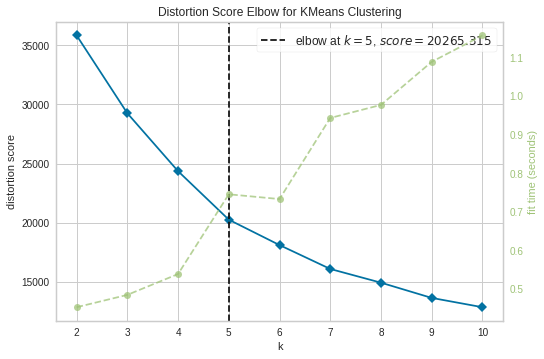

In [85]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

O método elbow é utilizado para indicar um número ótimo de clusters para separação dos clientes, caso não haja uma definição prévia, que o caso desse case.

In [87]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
Cluster_AC = AC.fit_predict(scaled_ds)
scaled_ds["Clusters"] = Cluster_AC
#Adding the Clusters feature to the orignal dataframe.
cluster_df["Clusters"]= Cluster_AC

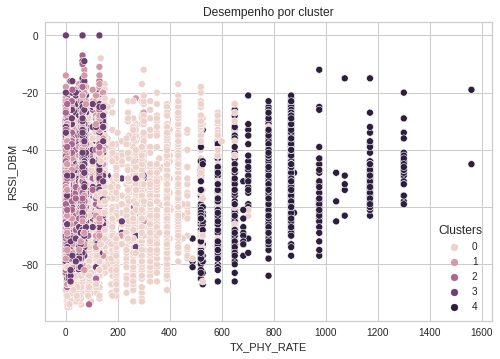

In [93]:
sns.scatterplot(data = cluster_df,
            x = 'TX_PHY_RATE',
            y = 'RSSI_DBM',
            hue = 'Clusters')
plt.title('Desempenho por cluster')
plt.show()

Não há clara distinção em relação a desempenho nos diferentes clusters, salvo com relação a velocidade, em que o cluster "4" possui grande vantagem.